# Employee turnover analysis

#### 1) reading data and train test split

In [4]:
import pandas as pd
import os
os.chdir("D:/Python WD/profit_maximizing_classifier")

dataset= pd.read_csv("E:/PC Backup/Others/fiverr/employee turnover/HRSurveyData.csv")
dataset.dtypes
dataset[['sales', 'salary']]= dataset[['sales', 'salary']].astype('category')
dataset= pd.get_dummies(dataset)
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from source import local_functions
import importlib
importlib.reload(local_functions)


<module 'source.local_functions' from 'D:\\Python WD\\profit_maximizing_classifier\\source\\local_functions.py'>

#### 2) splitting the data into train and test of ratio 80/20

In [5]:

X= dataset.drop('left', axis=1)
Y= dataset[['left']]
X, test_X, Y, test_Y= train_test_split(X, Y, test_size=.2, random_state=1234)


#### 3) fitting a machine learning model

In [6]:

estimator= DecisionTreeClassifier(max_depth= 4)
#estimator1= RandomForestClassifier()
estimator.fit(X,Y)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### 4) Checking the performance of the model 

In [11]:
local_functions.evaluate_estimators(test_X, test_Y,[estimator])

[accuracy_score                                                                 0.966
 confusion_matrix                                             [[2229, 36], [66, 669]]
 f1_score                                                                    0.929167
 precision_recall_fscore_support    ([0.9712418300653595, 0.948936170212766], [0.9...
 recall_score                                                                0.910204
 precision_score                                                             0.948936
 auc                                                                         0.947155
 loss_index                                                                 0.0136667
 total_loss                                                                       246
 total_profit                                                                   10899
 prec_recall_plot                                                     Figure(432x288)
 plot_lyft_chart                                 AxesS

#### 5) Visualizing Most important factors 

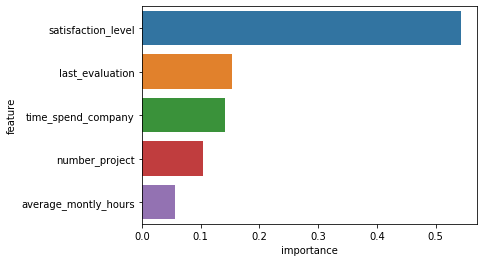

In [8]:
importance_data= pd.DataFrame({'feature':X.columns,'importance': estimator.feature_importances_}).sort_values(by='importance',ascending=False)[0:5]
import seaborn as sns
sns.barplot(y='feature', x= 'importance', data= importance_data)


#### 6) Exporting the tree rules

In [9]:
def tree_to_txt():
    from sklearn.tree import export_text
    r = export_text(estimator, feature_names=(list(X.columns)))
    print(r)
    # Program to show various ways to read and
    # write data in a file.
    file1 = open("output/turnover_rules.txt", "w")
    L = [r]

    # \n is placed to indicate EOL (End of Line)
    file1.write("Turnover rules \n")
    file1.writelines(L)
    file1.close()  # to change file access modes
tree_to_txt()


|--- satisfaction_level <= 0.47
|   |--- number_project <= 2.50
|   |   |--- last_evaluation <= 0.57
|   |   |   |--- last_evaluation <= 0.44
|   |   |   |   |--- class: 0
|   |   |   |--- last_evaluation >  0.44
|   |   |   |   |--- class: 1
|   |   |--- last_evaluation >  0.57
|   |   |   |--- average_montly_hours <= 279.00
|   |   |   |   |--- class: 0
|   |   |   |--- average_montly_hours >  279.00
|   |   |   |   |--- class: 1
|   |--- number_project >  2.50
|   |   |--- satisfaction_level <= 0.11
|   |   |   |--- class: 1
|   |   |--- satisfaction_level >  0.11
|   |   |   |--- number_project <= 6.50
|   |   |   |   |--- class: 0
|   |   |   |--- number_project >  6.50
|   |   |   |   |--- class: 1
|--- satisfaction_level >  0.47
|   |--- time_spend_company <= 4.50
|   |   |--- average_montly_hours <= 290.50
|   |   |   |--- number_project <= 6.50
|   |   |   |   |--- class: 0
|   |   |   |--- number_project >  6.50
|   |   |   |   |--- class: 1
|   |   |--- average_montly_hours 

D:\ProgramData\Anaconda3\envs\Python_for_Pycharm\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


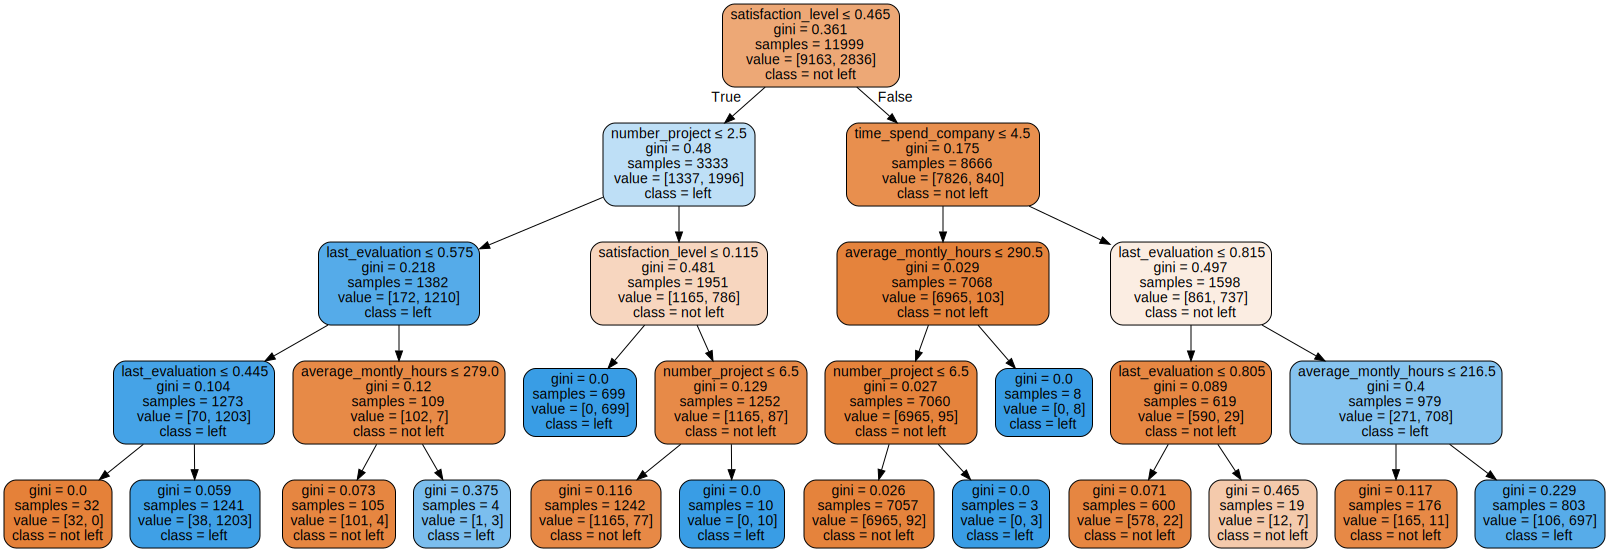

In [10]:
def tree_to_pdf():
    from sklearn.externals.six import StringIO
    from sklearn import tree
    from IPython.display import Image
    from sklearn.tree import export_graphviz
    import os
    os.environ['PATH'] = os.environ['PATH'] + ';' + os.environ['CONDA_PREFIX'] + r"\Library\bin\graphviz"

    import graphviz
    dot_data = tree.export_graphviz(estimator, out_file=None)
    dot_data= tree.export_graphviz(estimator, out_file=None,feature_names=X.columns, class_names={0:'not left',1:'left'}, filled=True, rounded=True,  special_characters=True)
    graph = graphviz.Source(dot_data)
    graph
    #graph.render("output/employee turnover")
    return graph
tree= tree_to_pdf()
tree